In [15]:
#!pip3 install geopandas
from IPython.display import display
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np

df = pd.read_csv('~/Documents/research/acinetobacter/SraRunTable.txt')
#print(df)

type(df)
df.columns

Index(['Run', 'Assay Type', 'Center Name', 'Consent', 'Experiment',
       'Instrument', 'LibraryLayout', 'LibrarySelection', 'LibrarySource',
       'Platform',
       ...
       'Temp', 'alternate_id', 'Sample_id', 'root_sample_id (exp)',
       'root_sample_id (run)', 'sample_id (exp)', 'sample_id (run)',
       'exposure', 'Library', 'Specimen_voucher'],
      dtype='object', length=148)

   African_Country  Isolates/sequences
0          Nigeria                  84
1            Egypt                  52
2            Ghana                  24
3     South Africa                  16
4         Ethiopia                   8
5           Rwanda                   7
6           Zambia                   7
7            Libya                   6
8          Algeria                   6
9            Kenya                   4
10    Burkina Faso                   4
11           Benin                   3
12            Mali                   2
13           Sudan                   1


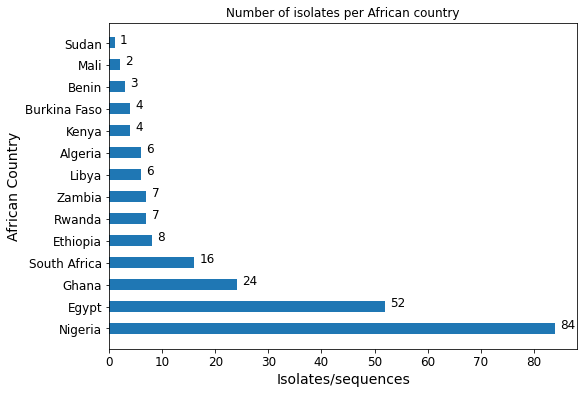

<Figure size 432x288 with 0 Axes>

In [2]:
countries = df['geo_loc_name_country'].value_counts()

# converting to df and assigning new names to the columns
df1 = pd.DataFrame(countries)
df1 = df1.reset_index()

df1.columns = ['African_Country', 'Isolates/sequences'] # change column names
print(df1)

fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xlabel('Isolates/sequences', fontsize=14)
ax.set_ylabel('African Country', fontsize=14)

plt.subplots_adjust(left=0.25)

# plot the horizontal bar chart
bar_plot = ax.barh(df1['African_Country'], df1['Isolates/sequences'], height=0.5)

# add the counts to the bars
for i, val in enumerate(df1['Isolates/sequences']):
    ax.text(val + 1, i, str(val), fontsize=12)

# set the y-axis ticks to the African country names
ax.set_yticks(range(len(df1)))
ax.set_yticklabels(df1['African_Country'])
ax.set_title("Number of isolates per African country")

# set the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()
plt.savefig('country.png')

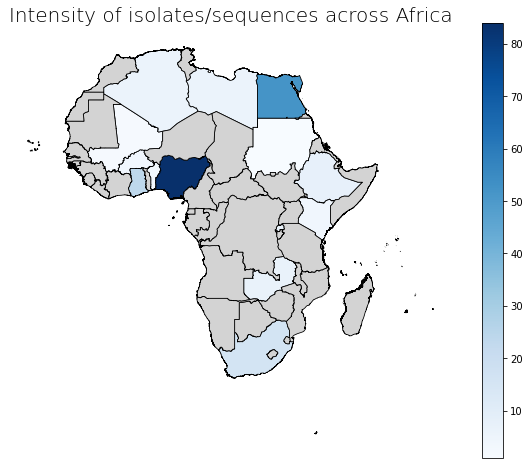

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the Africa shapefile
africa = gpd.read_file('~/Documents/research/acinetobacter/africa_map/afr_g2014_2013_0.shp')

# Get count of isolates/sequences per country
counts = df.groupby('geo_loc_name_country').size().reset_index(name='counts')

# Merge the counts with the Africa shapefile
africa_counts = africa.merge(counts, left_on='ADM0_NAME', right_on='geo_loc_name_country', how='left')

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
ax.axis('off')
ax.set_title('Intensity of isolates/sequences across Africa', fontdict={'fontsize': '20', 'fontweight' : '3'})

# Set the colormap and normalization
cmap = plt.get_cmap('Blues')
vmin, vmax = africa_counts['counts'].min(), africa_counts['counts'].max()

# Plot the map with colors representing the number of isolates/sequences
africa_counts.plot(column='counts', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='black',
                   missing_kwds={'color': 'lightgray', 'label': 'No isolates/sequences'})

# Create a colorbar legend
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)

#save the plot as png
fig.savefig('africa_map.png', dpi=300, bbox_inches='tight')

                 Isolation_Source  Isolates/sequences
0                           blood                  25
1                hospital surface                  15
2                           urine                  13
3                           wound                   8
4                     Homo sapien                   8
5                             BAL                   6
6                    swab (wound)                   6
7                       CVP Blood                   6
8                          sputum                   4
9               clinical material                   4
10                       aspirate                   3
11                  Blood culture                   3
12                  not collected                   3
13              Endotracheal tube                   2
14            hospital wastewater                   2
15                   pus aspirate                   2
16  unspecified diagnostic sample                   2
17                         t

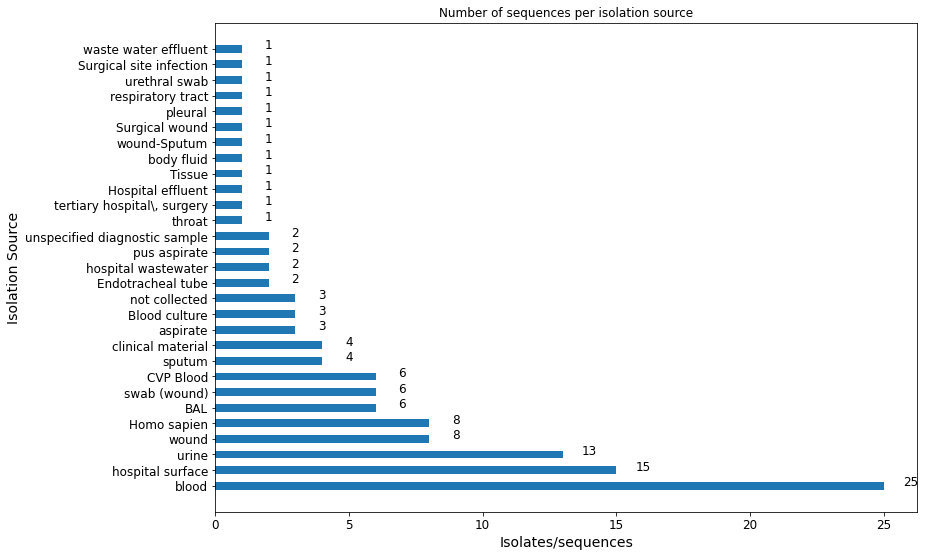

<Figure size 432x288 with 0 Axes>

In [3]:
sources = df['Isolation_Source'].value_counts()


# converting to df and assigning new names to the columns
df2 = pd.DataFrame(sources)
df2 = df2.reset_index()

df2.columns = ['Isolation_Source', 'Isolates/sequences'] # change column names
print(df2)

fig, ax = plt.subplots(figsize=(15, 9))

ax.set_xlabel('Isolates/sequences', fontsize=14)
ax.set_ylabel('Isolation Source', fontsize=14)

plt.subplots_adjust(left=0.25)

# plot the horizontal bar chart
bar_plot = ax.barh(df2['Isolation_Source'], df2['Isolates/sequences'], height=0.5)

# add the counts to the bars
for i, val in enumerate(df2['Isolates/sequences']):
    ax.text(val + 1, i, str(val), fontsize=12, ha='center')

# set the y-axis ticks to the isolation source names
ax.set_yticks(range(len(df2)))
ax.set_yticklabels(df2['Isolation_Source'])
ax.set_title("Number of sequences per isolation source")

# set the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()
plt.savefig('source.png')

               Host  Isolates/sequences
0      Homo sapiens                  53
1  hosptial surface                  15
2   Musca domestica                   1


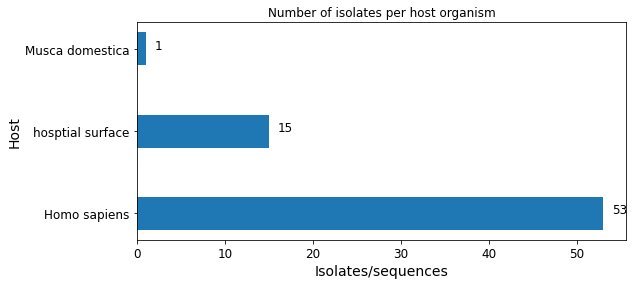

<Figure size 432x288 with 0 Axes>

In [4]:
host = df['host_scientific_name'].value_counts()

# converting to df and assigning new names to the columns
df3 = pd.DataFrame(host)
df3 = df3.reset_index()

df3.columns = ['Host', 'Isolates/sequences'] # change column names
print(df3)

fig, ax = plt.subplots(figsize=(8, 4))

ax.set_xlabel('Isolates/sequences', fontsize=14)
ax.set_ylabel('Host', fontsize=14)

plt.subplots_adjust(left=0.05)

# plot the horizontal bar chart
bar_plot = ax.barh(df3['Host'], df3['Isolates/sequences'], height=0.4)

# add the counts to the bars
for i, val in enumerate(df3['Isolates/sequences']):
    ax.text(val + 1, i, str(val), fontsize=12)

# set the y-axis ticks to the African country names
ax.set_yticks(range(len(df3)))
ax.set_yticklabels(df3['Host'])
ax.set_title("Number of isolates per host organism")

# set the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

plt.show()
plt.savefig('host.png')

In [22]:
# Group by BioProject and count the number of rows in each group
counts = df.groupby('BioProject').size()

# Filter out the groups that have no host_scientific_name
no_host = counts[counts.index.isin(df[df['host_scientific_name'].isna()]['BioProject'].unique())]

# Print the BioProjects with no host_scientific_name
print("BioProjects with no host_scientific_name:")
print(no_host)

BioProjects with no host_scientific_name:
BioProject
PRJEB58695     77
PRJNA411997     2
PRJNA513871     2
PRJNA526336     1
PRJNA592050     1
PRJNA624101     1
PRJNA627433     3
PRJNA672293     6
PRJNA688598    31
PRJNA690827    20
PRJNA718726     1
PRJNA719017     2
PRJNA722597     1
PRJNA804332     4
PRJNA835506     1
PRJNA850834     2
dtype: int64


In [43]:
# Fill in the missing host_scientific_name for PRJNA688598
df.loc[df['BioProject'] == 'PRJNA688598', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA690827
df.loc[df['BioProject'] == 'PRJNA690827', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA411997
df.loc[df['BioProject'] == 'PRJNA411997', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA804332 
df.loc[df['BioProject'] == 'PRJNA804332', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA850834 
df.loc[df['BioProject'] == 'PRJNA850834', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA719017 
df.loc[df['BioProject'] == 'PRJNA719017', 'host_scientific_name'] = 'Hospital wastewater'

# Fill in the missing host_scientific_name for PRJNA592050 
df.loc[df['BioProject'] == 'PRJNA592050', 'host_scientific_name'] = 'Air bacteria from surgical room'

# Fill in the missing host_scientific_name for PRJNA624101 
df.loc[df['BioProject'] == 'PRJNA624101', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA627433 
df.loc[df['BioProject'] == 'PRJNA627433', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA624101 
df.loc[df['BioProject'] == 'PRJNA624101', 'host_scientific_name'] = 'Homo sapiens'

# Fill in the missing host_scientific_name for PRJNA718726 
df.loc[df['BioProject'] == 'PRJNA718726', 'host_scientific_name'] = 'Hospital wastewater'

# Fill in the missing host_scientific_name for PRJNA722597 
df.loc[df['BioProject'] == 'PRJNA722597', 'host_scientific_name'] = 'Hospital wastewater'


# Save the updated dataframe to a new file
df.to_csv('~/Documents/research/acinetobacter/SraRunTable_updated.txt', index=False)

#read new txt to confirm the host_scientific_name was replaced
new_df = pd.read_csv('~/Documents/research/acinetobacter/SraRunTable_updated.txt')
new_df.columns

# Group by BioProject and count the number of rows in each group
new_counts = new_df.groupby('BioProject').size()

# Filter out the groups that have no host_scientific_name
new_no_host = new_counts[new_counts.index.isin(df[df['host_scientific_name'].isna()]['BioProject'].unique())]

# Print the BioProjects with no host_scientific_name
print("New BioProjects with no host_scientific_name:")
print(new_no_host)

New BioProjects with no host_scientific_name:
BioProject
PRJEB58695     77
PRJNA513871     2
PRJNA526336     1
PRJNA672293     6
PRJNA835506     1
dtype: int64


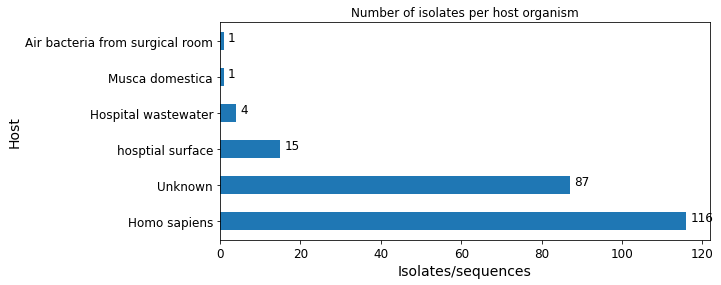

<Figure size 432x288 with 0 Axes>

In [45]:
# Get the counts of each host organism
host = new_df['host_scientific_name'].fillna('Unknown').value_counts(dropna=False)

# Convert to a dataframe and rename the columns
dif = pd.DataFrame(host)
dif = dif.reset_index()
dif.columns = ['Host', 'Isolates/sequences']

# Create the plot
fig, ax = plt.subplots(figsize=(8, 4))

# Set the axis labels
ax.set_xlabel('Isolates/sequences', fontsize=14)
ax.set_ylabel('Host', fontsize=14)

# Adjust the plot margins
plt.subplots_adjust(left=0.05)

# Plot the horizontal bar chart
bar_plot = ax.barh(dif['Host'], dif['Isolates/sequences'], height=0.5)

# Add the counts to the bars
for i, val in enumerate(dif['Isolates/sequences']):
    ax.text(val + 1, i, str(val), fontsize=12)

# Set the y-axis ticks to the host organism names
ax.set_yticks(range(len(dif)))
ax.set_yticklabels(dif['Host'])

# Set the plot title
ax.set_title("Number of isolates per host organism")

# Set the tick label size
ax.tick_params(axis='both', which='major', labelsize=12)

# Show the plot and save it to a file
plt.show()
plt.savefig('host.png')